### importing libs

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('Set-2-Program-1-Conv.jpeg', 1)

### Q1: Implement correlation operation with minimum three different masks in this context. How does the kernel interact with the image pixels?

(np.float64(-0.5), np.float64(3027.5), np.float64(2502.5), np.float64(-0.5))

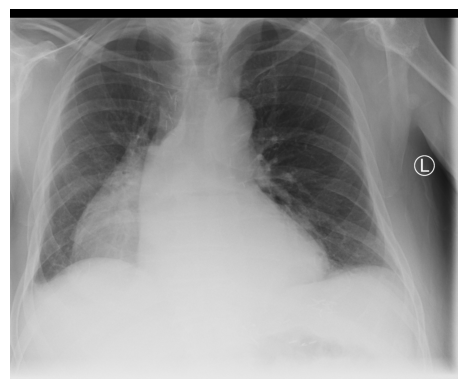

In [14]:
plt.imshow(img)
plt.axis('off')

In [33]:
k1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

k2 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

k3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

kernals = [k1, k2, k3]

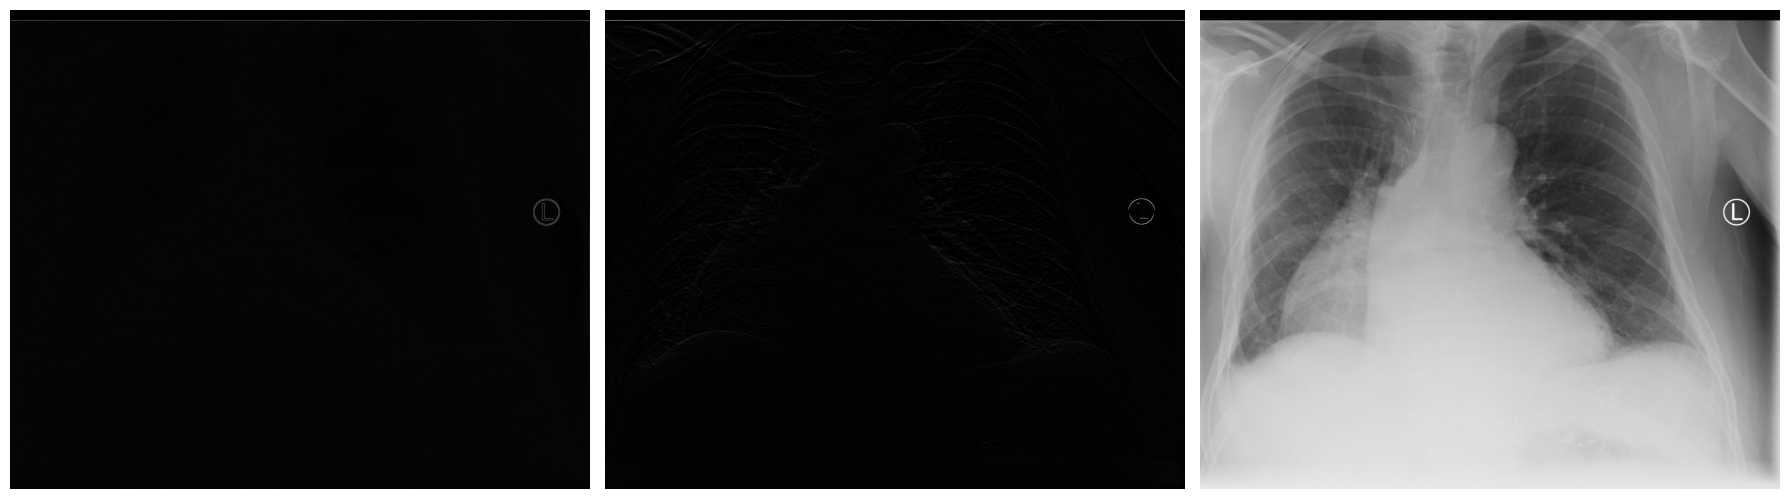

In [34]:
results = []
for k in kernals:
    kf = k.astype(np.float32)
    filtered = cv2.filter2D(img, ddepth=-1, kernel=kf)
    results.append(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, res, i in zip(axes, results, range(1, 4)):
    ax.imshow(res)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Q2: Apply convolution operation with minimum three different mask by flipping the mask in to 180 degrees. Why is this necessary?

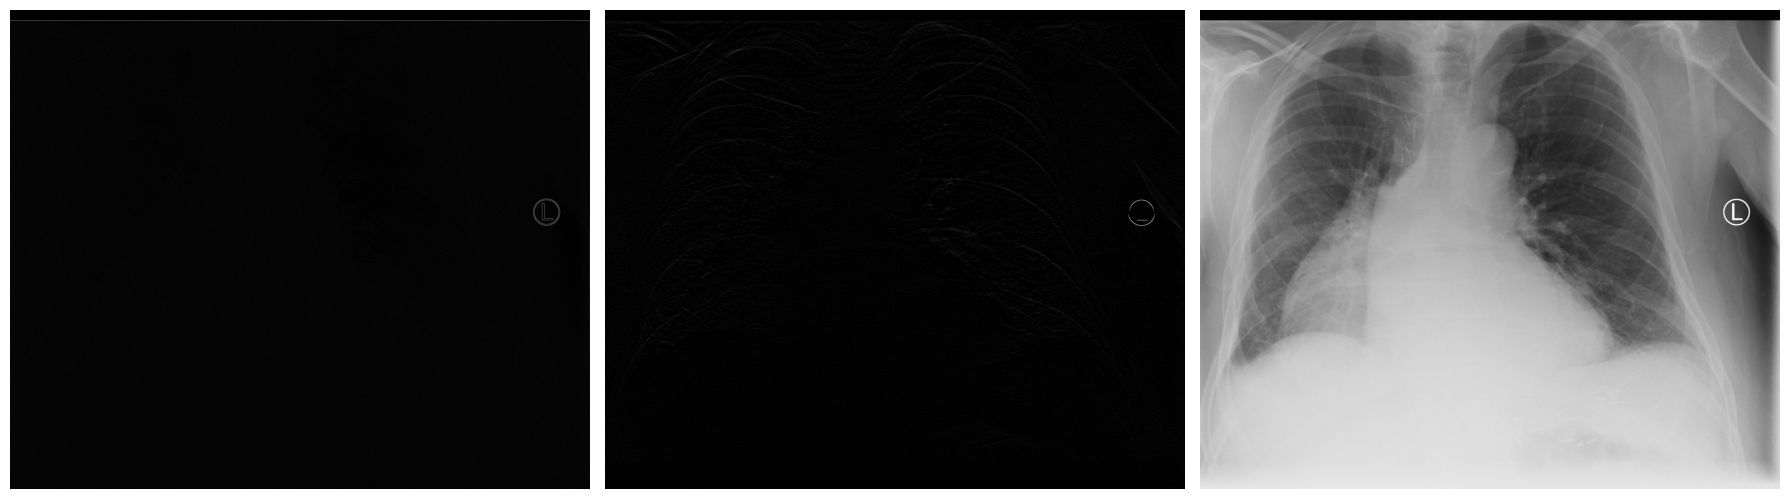

In [37]:
flipped_results = []
for k in kernals:
    k_flipped = np.rot90(k, 2)
    kf = k_flipped.astype(np.float32)
    conv = cv2.filter2D(img, ddepth=-1, kernel=kf)
    flipped_results.append(cv2.cvtColor(conv, cv2.COLOR_BGR2RGB))

fig2, axs2 = plt.subplots(1, len(flipped_results), figsize=(18, 6))
for ax, res, idx in zip(axs2, flipped_results, range(1, len(flipped_results) + 1)):
    ax.imshow(res)
    ax.axis('off')

plt.tight_layout()
plt.show()

flipping it 180 converts correlation into the mathematical convolution operation.

### Q3: Demonstrate How does correlation differ from convolution when applied to template matching?

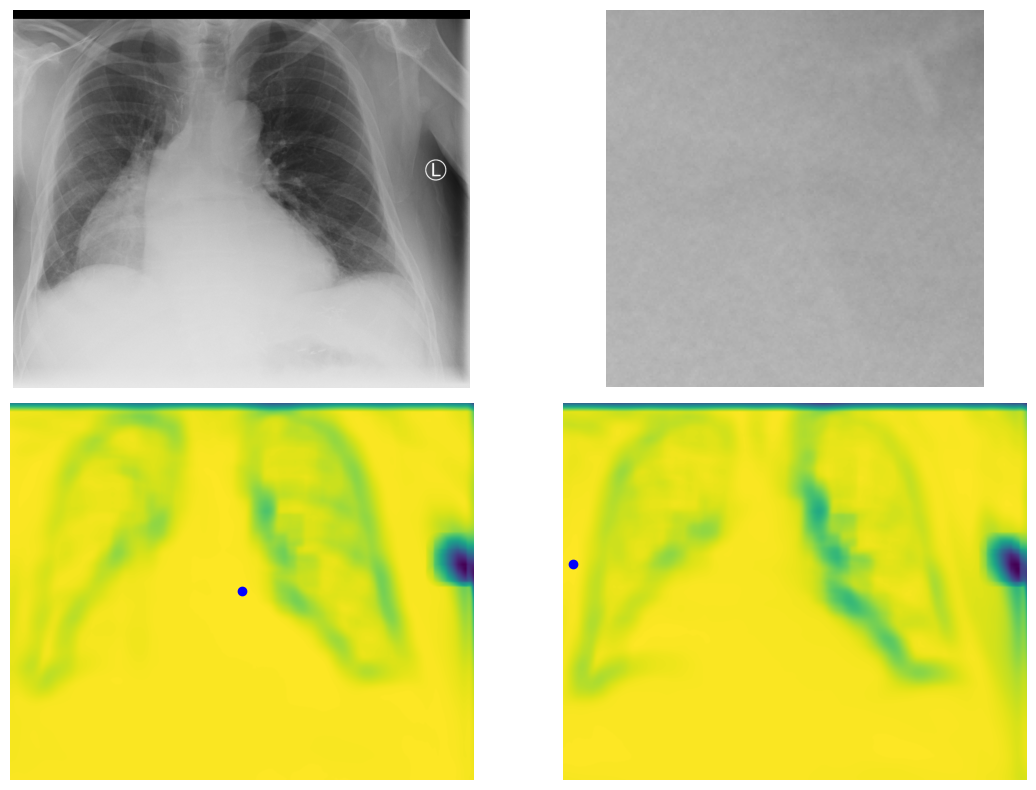

In [42]:
h, w = img.shape[:2]
th, tw = min(200, h//4), min(200, w//4)
template = img[h//2 - th//2:h//2 + th//2, w//2 - tw//2:w//2 + tw//2]

corr_map = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
flipped_template = cv2.flip(template, -1)
conv_map = cv2.matchTemplate(img, flipped_template, cv2.TM_CCORR_NORMED)

_, _, _, max_loc_corr = cv2.minMaxLoc(corr_map)
_, _, _, max_loc_conv = cv2.minMaxLoc(conv_map)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].imshow(img); axs[0, 0].axis('off'); axs[0, 0]
axs[0, 1].imshow(template); axs[0, 1].axis('off'); axs[0, 1]
axs[1, 0].imshow(corr_map); axs[1, 0].plot(max_loc_corr[0], max_loc_corr[1], 'bo'); axs[1, 0].axis('off'); axs[1, 0]
axs[1, 1].imshow(conv_map); axs[1, 1].plot(max_loc_conv[0], max_loc_conv[1], 'bo'); axs[1, 1].axis('off'); axs[1, 1]
plt.tight_layout()
plt.show()

### Q4: If the correlation output is not sharp enough in highlighting the abnormal patterns, what adjustments can be made to improve detection accuracy?

things to increase the accuracy of the highlighting patterns
- edge detection
- color mapping
- window tunining

### Q5: Given that convolution is commonly used for edge detection and correlation for pattern matching, under what conditions might one method be preferred over the other in medical imaging? Would combining both be beneficial?

convolution for edge‑enhancement or matched‑filter detection, and use correlation for template matching where orientation matters
A mix of them would sharpen and denoise first, then cross correlate with a template tends